In [1]:
# Importing libraries
import math
import numpy as np
from scipy.special import ndtri
from numpy.linalg import solve
from numpy.linalg import cholesky
from numpy.linalg import LinAlgError
from functools import partial
from scipy import integrate
from scipy.optimize import broyden1, broyden2, newton_krylov, fixed_point, fsolve, minimize, least_squares, minimize_scalar
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
import seaborn as sns
from tensorflow.keras import activations
from scipy.stats import multivariate_normal, norm 
import pickle
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

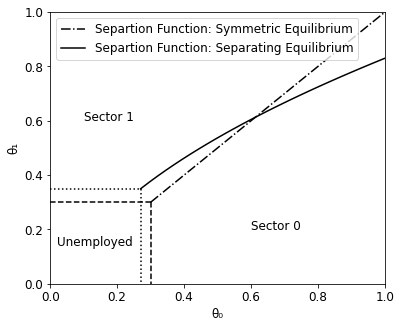

In [2]:
# Plot describing equilibria for different values of the correlation parameter and AMH copula
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
d = np.arange(0.3, 1.05, 0.025)
dd = np.arange(0.27, 1.05, 0.025)
fig, ax = plt.subplots(figsize=(6, 5))


for item in ([ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)

    
vecfunc1 = np.vectorize(lambda x: x)
ax.plot(d,vecfunc1(d), label='Separtion Function: Symmetric Equilibrium',linestyle='dashdot',color='black')

vecfunc2 = np.vectorize(lambda x: x**(0.5)-0.17)
ax.plot(dd,vecfunc2(dd), label='Separtion Function: Separating Equilibrium',color='black')
plt.plot([0, 0.3], [0.3, 0.3], 'k--')
plt.plot([0.3, 0.3], [0.3, 0], 'k--')
plt.plot([0, 0.27], [(0.3**(0.5)-0.2), (0.3**(0.5)-0.2)],color='black', linestyle='dotted')
plt.plot([0.27, 0.27], [(0.3**(0.5)-0.2), 0],color='black', linestyle='dotted')
plt.text(0.02, 0.14, 'Unemployed', fontsize=12)
plt.text(0.1, 0.6, 'Sector 1', fontsize=12)
plt.text(0.6, 0.2, 'Sector 0', fontsize=12)
ax.set_ylim([0, 1])
ax.set_xlim([0, 1])
ax.set_xlabel('θ0'.translate(subscript))
ax.set_ylabel('θ1'.translate(subscript))
ax.legend(loc='upper left',prop={'size': 12})
plt.savefig('isf.png')

In [2]:
# Gaussian copula pdf
def _gaussian(x,y, kappa):
    R = cholesky([[1,kappa],[kappa,1]])
    x = ndtri([x,y])
    z = solve(R,x.T)
    log_det= np.sum(np.log(np.diag(R)))
    return np.exp(-0.5 * np.sum(  np.power(z,2) - np.power(x,2) ) - log_det)

In [3]:
# Calculate equilibrium sufficent statistic and varius helper functions

def acop(x,y,kappa):
    if normd == 0:
        return ( 1 + kappa * ((1+x)*(1+y)-3) + (kappa**2)*(1-x)*(1-y)) / ((1-kappa*(1-x)*(1-y))**3)
    elif normd == 1:
        return _gaussian(x,y, kappa)
    return 

def func_b(k,m):
    out, err = integrate.dblquad(lambda x,y: acop(x,y,kappa), 0,1, lambda x: np.maximum(np.minimum(m + x * k,1),0), 1)
    return out -1/2

def det_m(k):
    return least_squares(partial(func_b,k),  [0],  bounds=[-5,5]).x[0]

def func_mx(x0,x1,m):
    out, err = integrate.dblquad(lambda x,y: acop(x,y,kappa), 0,1, lambda x: np.maximum(np.minimum(m + x * x0/x1,1),0), 1)
    ans1, err1 = integrate.dblquad(lambda x,y: x*acop(x,y,kappa), 0 , 1, lambda x: m + x *x0/x1, 1 )
    ans0, err0 = integrate.dblquad(lambda x,y: y*acop(x,y,kappa), 0,1 , 0, lambda x: m + x * x0/x1 )
    return np.array([2*ans0, 2*ans1, out])

def equilibrium_solve(guess):
    return least_squares(lambda x: func_mx(x[0],x[1],x[2])-np.array([x[0],x[1],1/2]),  guess, bounds=[[0.1,0.1,0.01],[0.9,0.9, 0.25]])

def func_x(k):
    k = np.minimum(1,k)
    m = det_m(k)
    ans1, err1 = integrate.dblquad(lambda x,y: x*acop(x,y,kappa), 0 , 1, lambda x: m + x * k,  1)
    ans0, err0 = integrate.dblquad(lambda x,y: y*acop(x,y,kappa), 0,1 , 0, lambda x: m + x * k )
    return ans0/ans1

def func_y(k,m):
    ans1, err1 = integrate.dblquad(lambda x,y: acop(x,y,kappa), 0 , 1, lambda x: m + x * k,  1)
    ans0, err0 = integrate.dblquad(lambda x,y: acop(x,y,kappa), 0,1 , 0, lambda x: m + x * k )
    return ans0, ans1

arg0
arg1
arg2


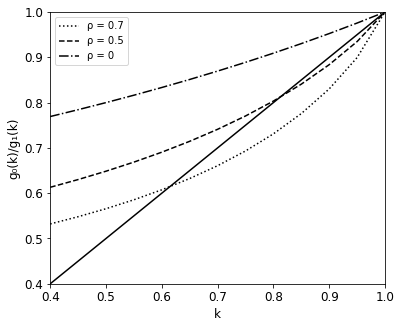

In [15]:
# Plot describing equilibria for different values of the correlation parameter and gaussian copula

subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
d = np.arange(0.4, 1.05, 0.05)
fig, ax = plt.subplots(figsize=(6, 5))

for item in ([ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)
normd=1

vecfunc1 = np.vectorize(lambda x: x)
ax.plot(d,vecfunc1(d),color='black')
print('arg0')
a = 'ρ = 0.7'
kappa=0.7
vecfunc2 = np.vectorize(func_x)
ax.plot(d,vecfunc2(d),label=a,color='black', linestyle='dotted')
print('arg1')
a =  'ρ = 0.5'
kappa=0.5
vecfunc3 = np.vectorize(func_x)
ax.plot(d,vecfunc3(d),label=a,color='black', linestyle='dashed')
print('arg2')
a = 'ρ = 0'
kappa=0
vecfunc5 = np.vectorize(func_x)
ax.plot(d,vecfunc5(d),label=a,color='black', linestyle='dashdot')


ax.set_ylim([0.4, 1])
ax.set_xlim([0.4, 1])
#ax.set_title("Illustration separate equilibrium - Gaussian copula")  
ax.set_xlabel('k')
ax.set_ylabel('g0(k)/g1(k)'.translate(subscript))
ax.legend()
plt.savefig('gc22.png')

In [101]:
normd = 1
kappa = 0.5
xx = equilibrium_solve([0.45, 0.67, 0.1])
#least_squares(lambda k: func_x(k)-k,  [0.81], bounds=[0.75,0.85])
xx

 active_mask: array([0, 0, 0])
        cost: 7.596617741252482e-19
         fun: array([3.27227134e-10, 1.18204535e-09, 1.22534649e-10])
        grad: array([-1.65118622e-09, -1.07309679e-10, -1.41776013e-09])
         jac: array([[ 0.50769898, -1.22371709,  1.45095535],
       [-1.42612106,  0.15763174, -1.45063607],
       [-1.07381329,  0.87155667, -1.45129939]])
     message: '`gtol` termination condition is satisfied.'
        nfev: 8
        njev: 8
  optimality: 5.804164752965454e-10
      status: 1
     success: True
           x: array([0.54848515, 0.67576905, 0.09417707])

In [57]:
normd = 1
kappa = 0.7
#newton_krylov(lambda k: func_x(k)-k,  [0])
xx2 = equilibrium_solve([0.4, 0.7, 0.15])
xx2

 active_mask: array([0, 0, 0])
        cost: 1.225015861644679e-16
         fun: array([ 2.81176010e-09, -1.52665767e-08,  2.00719064e-09])
        grad: array([1.82120108e-08, 2.35144822e-09, 2.39052561e-08])
         jac: array([[ 0.39315226, -0.85589584,  1.48695544],
       [-1.25745708, -0.22753637, -1.48750843],
       [-1.04150741,  0.63985976, -1.48708717]])
     message: '`gtol` termination condition is satisfied.'
        nfev: 6
        njev: 6
  optimality: 6.166547210848916e-09
      status: 1
     success: True
           x: array([0.43859782, 0.71391107, 0.19282041])

In [66]:
out1 = pd.DataFrame([xx])
out2 = pd.DataFrame([xx2])
out1.to_pickle("eq1")
out2.to_pickle("eq2")  

In [99]:
#Check condtion for comparative static result
normd = 1
kappa = 0.7
y = func_mx(xx.x[0],xx.x[1],xx.x[2])
func_y(xx.x[0]/xx.x[1],xx.x[2]), func_y(y[0]/y[1],xx.x[2])

((0.5000000000275909, 0.4999999999613931),
 (0.44111364610974474, 0.5588863538760862))

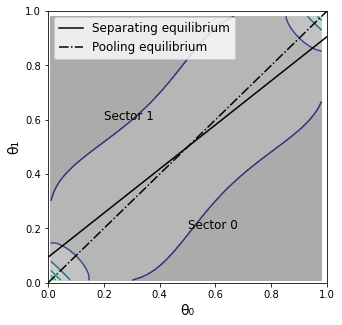

In [62]:
# Contour plot and equilibria distributions Gaussian copula ρ = 0.5
kappa = 0.5
k = xx.x[0]/xx.x[1]
m = xx.x[2]



fig, ax = plt.subplots(figsize=(5, 5))
d = np.arange(0, 1, 0.001)
vecfunc = np.vectorize(lambda x: (x-(1-k)/2)/k)
vecfunc2 = np.vectorize(lambda x: x)
x = np.arange(0.01,0.99,0.01)
y = np.arange(0.01,0.99,0.01)
X, Y = np.meshgrid(x,y)


zs = []
for i in np.arange(0.01,0.99,0.01):
    for j in np.arange(0.01,0.99,0.01):
        zs.append(acop(i,j,kappa))
zs = np.array(zs)
Z = zs.reshape(X.shape)
ax.contourf(X, Y, Z, cmap=plt.cm.gray,alpha=0.35)



ax.plot(vecfunc(d),d,label='Separating equilibrium',color='black')
vecfunc2 = np.vectorize(lambda x: x)
ax.plot(d,vecfunc2(d), label='Pooling equilibrium',linestyle='dashdot',color='black')
ax.set_ylim([0, 1])
ax.set_xlim([0, 1])
ax.set_xlabel('θ0'.translate(subscript))
ax.set_ylabel('θ1'.translate(subscript))
ax.legend(loc='upper left',prop={'size': 12})
plt.text(0.2, 0.6, 'Sector 1', fontsize=12)
plt.text(0.5, 0.2, 'Sector 0', fontsize=12)
for item in ([ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(14)    
plt.contour(X,Y,Z)

#plt.suptitle("Skill separation in competitive equilibria") 
plt.savefig('eqsepss05.png')

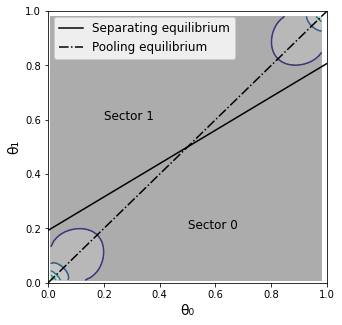

In [61]:
# Contour plot and equilibria distributions Gaussian copula ρ=0.7
kappa = 0.7
k = xx2.x[0]/xx2.x[1]
m = xx2.x[2]

fig, ax = plt.subplots(figsize=(5, 5))
d = np.arange(0, 1, 0.001)
vecfunc = np.vectorize(lambda x: (x-(1-k)/2)/k)
vecfunc2 = np.vectorize(lambda x: x)
x = np.arange(0.01,0.99,0.01)
y = np.arange(0.01,0.99,0.01)
X, Y = np.meshgrid(x,y)


zs = []
for i in np.arange(0.01,0.99,0.01):
    for j in np.arange(0.01,0.99,0.01):
        zs.append(acop(i,j,kappa))
zs = np.array(zs)
Z = zs.reshape(X.shape)
ax.contourf(X, Y, Z, cmap=plt.cm.gray,alpha=0.35)



ax.plot(vecfunc(d),d,label='Separating equilibrium',color='black')
vecfunc2 = np.vectorize(lambda x: x)
ax.plot(d,vecfunc2(d), label='Pooling equilibrium',linestyle='dashdot',color='black')
ax.set_ylim([0, 1])
ax.set_xlim([0, 1])
ax.set_xlabel('θ0'.translate(subscript))
ax.set_ylabel('θ1'.translate(subscript))
ax.legend(loc='upper left',prop={'size': 12})
plt.text(0.2, 0.6, 'Sector 1', fontsize=12)
plt.text(0.5, 0.2, 'Sector 0', fontsize=12)
for item in ([ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(14)    
plt.contour(X,Y,Z)

#plt.suptitle("Skill separation in competitive equilibria") 
plt.savefig('eqsepss.png')

In [4]:
up = 1
dw = 0
def beta_part(x):
    return 0-β*np.power(1-x,2)

def theta_det(x_0,x_1,θ,C):
    if θ==0:
        return dw
    elif θ==1:
        return pw
    meany = C + np.power( x_0, γ ) * np.exp( ndtri( [θ] )[0] )
    meany = meany / np.power( x_1, γ )
    out = 0 if meany<= 0 else norm.cdf( np.log( meany ) )
    return out

def equilibrium_xs(x_0,x_1,C):
    out, err = integrate.dblquad(lambda x,y: acop(x,y,kappa), dw, up, lambda x: theta_det(x_0,x_1,x,C), up)
    out2, err2 = integrate.dblquad(lambda x,y: acop(x,y,kappa), dw, up, lambda x: theta_det(x_1,x_0,x,-C), up)
    ans0, err0 = integrate.dblquad(lambda y,x: x*acop(x,y,kappa), dw, up, lambda x: dw, lambda x: theta_det(x_0,x_1,x,C))
    ans1, err1 = integrate.dblquad(lambda y,x: y*acop(x,y,kappa), dw, up, lambda x: theta_det(x_0,x_1,x,C), up)
    return np.array([2*ans0, 2*ans1, out-1/2,out2 -1/2])

def equilibrium_solve(beta, guess):
    global β
    β = beta
    return least_squares(lambda x: equilibrium_xs(x[0],x[1],x[2])-np.array([x[0],x[1],0,0]),  guess, bounds=[[0.1,0.1,0],[0.9,0.9, np.inf]])

def trans(θ,x):
    return norm.cdf( log_func(θ,x) )

def trans_diff(θ,x):
    return norm.pdf( log_func(θ,x) ) / ( θ - beta_part(x) )

def log_func(θ,x):
    out = ( θ - beta_part(x) ) / np.power( x, γ )
    checker = 0 if out <= 0 else np.log( out )
    return checker

def mass_wage_sector(x,θ,C,deff):
    if deff == dw:
        x_0, x_1 = x
        ans, err = integrate.quad(lambda x: acop(x,trans(θ,x_0),kappa), dw, theta_det(x_0,x_1,trans(θ,x_0),C))
    elif deff == up:
        x_1, x_0 = x
        ans, err = integrate.quad(lambda x: acop(trans(θ,x_0),x,kappa), dw, theta_det(x_0,x_1,trans(θ,x_0),-C))
    out = ans * trans_diff(θ,x_0)
    return out

def summer(x,θ,C):
    x_0, x_1 = x
    ans0, err = integrate.quad(lambda x: acop(x,trans(θ,x_0),kappa), dw, theta_det(x_0,x_1,trans(θ,x_0),C))
    if θ >= C + beta_part(x_1):
        ans1, err = integrate.quad(lambda x: acop(trans(θ,x_1),x,kappa), dw, theta_det(x_1,x_0,trans(θ,x_1),-C))
        return ans0* trans_diff(θ,x_0) + ans1* trans_diff(θ,x_1)
    else:
        return ans0 * trans_diff(θ,x_0)

In [89]:
##### β = 0
a = 2.5/5 # 2/5
b = math.sqrt(1-a**2)
er1, er2 = 2*a*b, a+b
er1, er2

(0.8660254037844386, 1.3660254037844386)

In [9]:
# Solving for the separating equilibrium (good guess inserted)
normd = 1
eqk = np.array([])
for i in [1]:
    if i==0:
        γ = 1
        kappa = 0.8
    elif i==1:
        γ = 1
        kappa = 0.82
    elif i==2:
        γ = 1
        kappa = 0.9
    elif i==3:
        γ = 1.5
        kappa = 0.9        
    eqk = np.append(eqk,equilibrium_solve(0,[0.51794095, 0.62303271, 0.17137321]))
eqk

array([ active_mask: array([0, 0, 0])
        cost: 2.72012200433386e-19
         fun: array([ 1.59914082e-10,  6.23435525e-10,  2.44598564e-10, -2.64483602e-10])
        grad: array([-1.25932843e-09,  3.98091520e-10, -1.11086096e-09])
         jac: array([[ 0.22324009, -1.06944169,  0.86651807],
       [-1.18505829,  0.05041217, -0.91838304],
       [-1.0925926 ,  1.0561787 , -1.32960103],
       [ 1.09259569, -1.05617805,  1.32960337]])
     message: '`gtol` termination condition is satisfied.'
        nfev: 7
        njev: 7
  optimality: 1.1108609626901874e-09
      status: 1
     success: True
           x: array([0.48249998, 0.64716662, 0.11758979])], dtype=object)

In [95]:
out1 = pd.DataFrame(eqk)
out1.to_pickle("eqks")

In [7]:
# Testing that this is in fact probability distributions
x_0, x_1, C = eqk[0].x
γ = 1
kappa = 0.8
β = 0
if x_0 > x_1:
    C = -C
    x_low = - C + beta_part(x_0)
else:
    x_low = beta_part(x_0)
    
integrate.dblquad(lambda x, y: trans_diff(y,x_0)*acop(trans(y,x_0),x,kappa), x_low, 18, lambda y: 0, lambda y: theta_det(x_0,x_1,trans(y,x_0),C))

(0.4998387813818371, 1.4788010024857634e-08)

In [44]:
kappa = 0.5
γ = 2
equilibrium_xs(1,1,0), eq753[0:2]

(array([6.15026728e-01, 6.15026733e-01, 3.35176331e-13, 3.35176331e-13]),
 0    0.336862
 1    0.748579
 Name: 0, dtype: float64)

In [187]:
eqk

array([ active_mask: array([0, 0, 0])
        cost: 5.287885027564842e-18
         fun: array([ 7.09648451e-11, -3.25038541e-09,  2.29914976e-11, -7.21120941e-11])
        grad: array([ 3.99419515e-09, -1.97752122e-10,  2.99574381e-09])
         jac: array([[ 0.31554482, -1.0849139 ,  0.88163505],
       [-1.25466112,  0.06769913, -0.93714015],
       [-1.11803818,  1.04398962, -1.18699663],
       [ 1.11804074, -1.04398569,  1.18700094]])
     message: '`gtol` termination condition is satisfied.'
        nfev: 8
        njev: 8
  optimality: 1.3274261787928008e-09
      status: 1
     success: True
           x: array([0.43233884, 0.67766932, 0.18879901])], dtype=object)

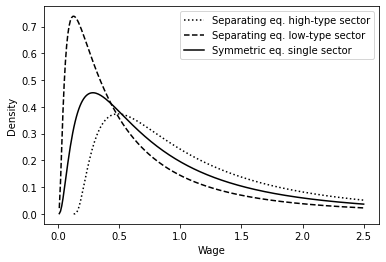

In [10]:
#Plotting wage distributions
normd = 1
β = 0
for i in [1]:
    if i == 0:
        kappa = 0.8
        γ = 1
    elif i == 1:
        kappa = 0.81
        γ = 1
    elif i == 2:
        kappa = 0.9
        γ = 1
    elif i == 3:
        kappa = 0.9
        γ = 1.5
        
    x_0, x_1, C = eqk[i-1].x
    x = eqk[i-1].x[0:2]
    x_sym =equilibrium_xs(1,1,0)[0:2]
    
    d_low = np.arange(beta_part(x_0)+0.01, 2.5, 0.01)
    d_high = np.arange(C +beta_part(x_0)+0.01, 2.5, 0.01)
    d_med = np.arange(0.01+beta_part(x_sym[0]), 2.5, 0.01)
    


    low_wage = np.vectorize(lambda θ: mass_wage_sector(x,θ,C,0))(d_low)
    high_wage = np.vectorize(lambda θ: mass_wage_sector(x,θ,C,1))(d_high)
    med_wage = np.vectorize(lambda θ: mass_wage_sector(x_sym,θ,0,0))(d_med)

    fig, ax = plt.subplots()

    ax.plot(d_high,high_wage, label='Separating eq. high-type sector', color='black', linestyle='dotted')
    ax.plot(d_low,low_wage, label='Separating eq. low-type sector', color='black', linestyle='dashed')
    ax.plot(d_med,med_wage, label='Symmetric eq. single sector', color='black')

    plt.legend()
    #plt.title('Wage distributions in different eq')
    plt.xlabel('Wage')
    plt.ylabel('Density')
    plt.savefig('wd0.82.png')    
        # plt.savefig('wd' + f'{str(i)}' +'.png')    

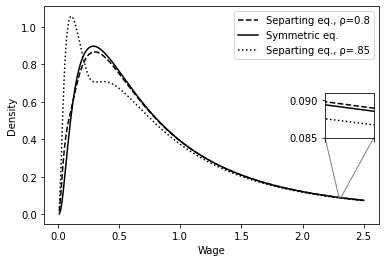

In [11]:
kappa = 0.8
γ = 1
x_0, x_1, C = eqk[0].x
x = eqk[0].x[0:2]
x_sym =equilibrium_xs(1,1,0)[0:2]
d_low = np.arange(beta_part(x_0)+0.01, 2.5, 0.01)

sum_wage = np.vectorize(lambda θ: summer(x,θ,C))(d_low)
med_wage = np.vectorize(lambda θ: mass_wage_sector(x_sym,θ,0,0))(d_low)
sum_med_wage = 2*med_wage

fig, ax = plt.subplots()

ax.plot(d_low,sum_wage, label='Separting eq., ρ=0.8',color='black', linestyle='dashed')
ax.plot(d_low,sum_med_wage, label='Symmetric eq.',color='black')

kappa = 0.85
x_0, x_1, C = eqk[1].x
x = eqk[1].x[0:2]

sum_wage_2 = np.vectorize(lambda θ: summer(x,θ,C))(d_low)


ax.plot(d_low,sum_wage_2, label='Separting eq., ρ=.85',color='black', linestyle='dotted')
plt.legend()
plt.xlabel('Wage')
plt.ylabel('Density')

axins = zoomed_inset_axes(ax, 40, loc=7)
axins.plot(d_low,sum_wage,color='black', linestyle='dashed')
axins.plot(d_low,sum_med_wage, color='black')
axins.plot(d_low,sum_wage_2, linestyle='dotted',color='black')


# sub region of the original image
x1, x2, y1, y2 = 2.3, 2.31, 0.085, 0.091
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

plt.xticks(visible=False)
#plt.yticks(visible=False)
mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5")
#plt.title('Total wage distributions in different eq')

plt.savefig('twd1.png')

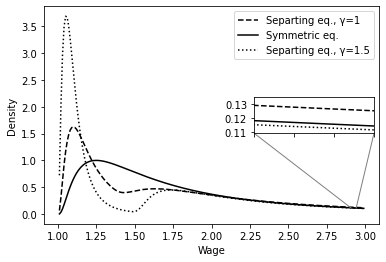

In [129]:
kappa = 0.9
γ = 1
x_0, x_1, C = eqk[2].x
x = eqk[2].x[0:2]
x_sym =equilibrium_xs(1,1,0)[0:2]
d_low = np.arange(beta_part(x_0)+0.01, 3, 0.01)
d_med = np.arange(beta_part(x_sym[0])+0.01, 3, 0.01)
sum_wage = np.vectorize(lambda θ: summer(x,θ,C))(d_low)
med_wage = np.vectorize(lambda θ: mass_wage_sector(x_sym,θ,0,0))(d_med)
sum_med_wage = 2*med_wage

fig, ax = plt.subplots()

ax.plot(d_low,sum_wage, label='Separting eq., γ=1',color='black', linestyle='dashed')
ax.plot(d_med,sum_med_wage, label='Symmetric eq.',color='black')

γ=1.5
x_0, x_1, C = eqk[3].x
x = eqk[3].x[0:2]
adj = 1-beta_part(x_sym[0])

sum_wage_2 = np.vectorize(lambda θ: summer(x,θ,C))(d_low_2)

ax.plot(d_low,sum_wage_2, label='Separting eq., γ=1.5',color='black', linestyle='dotted')
plt.legend()
plt.xlabel('Wage')
plt.ylabel('Density')

axins = zoomed_inset_axes(ax, 26, loc=7)
axins.plot(d_low,sum_wage,color='black', linestyle='dashed')
axins.plot(d_med,sum_med_wage, color='black')
axins.plot(d,sum_wage_2, linestyle='dotted',color='black')


# sub region of the original image
x1, x2, y1, y2 = 2.91, 2.94, 0.109, 0.135
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

plt.xticks(visible=False)
#plt.yticks(visible=False)
mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5")
#plt.title('Total wage distributions in different eq')

plt.savefig('tot_wage_dist2.png')

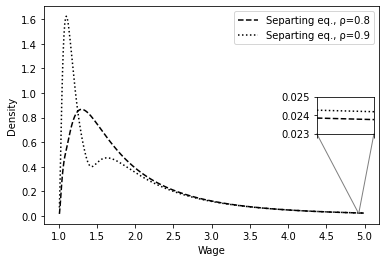

In [165]:
kappa = 0.8
γ = 1
x_0, x_1, C = eqk[0].x
x = eqk[0].x[0:2]
x_sym =equilibrium_xs(1,1,0)[0:2]
d_low = np.arange(beta_part(x_0)+0.01, 5, 0.01)
sum_wage = np.vectorize(lambda θ: summer(x,θ,C))(d_low)

fig, ax = plt.subplots()

ax.plot(d_low,sum_wage, label='Separting eq., ρ=0.8',color='black', linestyle='dashed')

kappa = 0.9
x_0, x_1, C = eqk[2].x
x = eqk[2].x[0:2]


sum_wage_2 = np.vectorize(lambda θ: summer(x,θ,C))(d_low)

ax.plot(d_low,sum_wage_2, label='Separting eq., ρ=0.9',color='black', linestyle='dotted')
plt.legend()
plt.xlabel('Wage')
plt.ylabel('Density')

axins = zoomed_inset_axes(ax, 150, loc=7)
axins.plot(d_low,sum_wage,color='black', linestyle='dashed')

axins.plot(d_low,sum_wage_2, linestyle='dotted',color='black')


# sub region of the original image
x1, x2, y1, y2 = 4.92, 4.925, 0.023, 0.025
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

plt.xticks(visible=False)
#plt.yticks(visible=False)
mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5")
#plt.title('Total wage distributions in different eq')

plt.savefig('tot_wage_dist3.png')

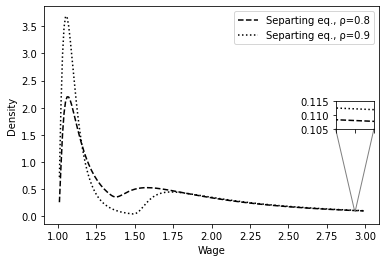

In [166]:
kappa = 0.8
γ = 1.5
x_0, x_1, C = eqk[1].x
x = eqk[1].x[0:2]
x_sym =equilibrium_xs(1,1,0)[0:2]
d_low = np.arange(beta_part(x_0)+0.01, 3, 0.01)
sum_wage = np.vectorize(lambda θ: summer(x,θ,C))(d_low)

fig, ax = plt.subplots()

ax.plot(d_low,sum_wage, label='Separting eq., ρ=0.8',color='black', linestyle='dashed')

kappa = 0.9
x_0, x_1, C = eqk[3].x
x = eqk[3].x[0:2]


sum_wage_2 = np.vectorize(lambda θ: summer(x,θ,C))(d_low)

ax.plot(d_low,sum_wage_2, label='Separting eq., ρ=0.9',color='black', linestyle='dotted')
plt.legend()
plt.xlabel('Wage')
plt.ylabel('Density')

axins = zoomed_inset_axes(ax, 50, loc=7)
axins.plot(d_low,sum_wage,color='black', linestyle='dashed')

axins.plot(d,sum_wage_2, linestyle='dotted',color='black')


# sub region of the original image
x1, x2, y1, y2 = 2.93, 2.935, 0.105, 0.115
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

plt.xticks(visible=False)
#plt.yticks(visible=False)
mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5")
#plt.title('Total wage distributions in different eq')

plt.savefig('tot_wage_dist4.png')